In [ ]:
# 訓練集vs驗證集_儲存模型

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [2]:
# 讀取 `train.pkl`
data = pd.read_pickle("data/train.pkl")
X = data.drop(columns=["NObeyesdad"])
y = data["NObeyesdad"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)


In [7]:
# 訓練模型(分類型xgboost)
import xgboost as xgb
# model = xgb.XGBClassifier() # 未填參數

model = xgb.XGBClassifier(
    n_estimators=250,     # 增加樹的數量，測試後200~300之間比較好。
    learning_rate=0.05,   # 降低學習率，防止過擬合
    max_depth=6,          # 調整決策樹深度
    subsample=0.8,        # 每次訓練時，隨機取 80% 樣本
    colsample_bytree=0.8, # 每次決策樹選擇 80% 特徵
    reg_alpha=0.01,       # L1 正則化
    reg_lambda=0.1,       # L2 正則化
    random_state=42
)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [4]:
# F1-Score 評估
from sklearn.metrics import f1_score

# 計算訓練組 F1-score
y_train_pred = model.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred, average="macro")
print(f"訓練組 F1-score: {train_f1:.3f}")

# 計算驗證組 F1-score
y_valid_pred = model.predict(X_valid)
valid_f1 = f1_score(y_valid, y_valid_pred, average="macro")
print(f"驗證組 F1-score: {valid_f1:.3f}")

訓練組 F1-score: 0.955
驗證組 F1-score: 0.899


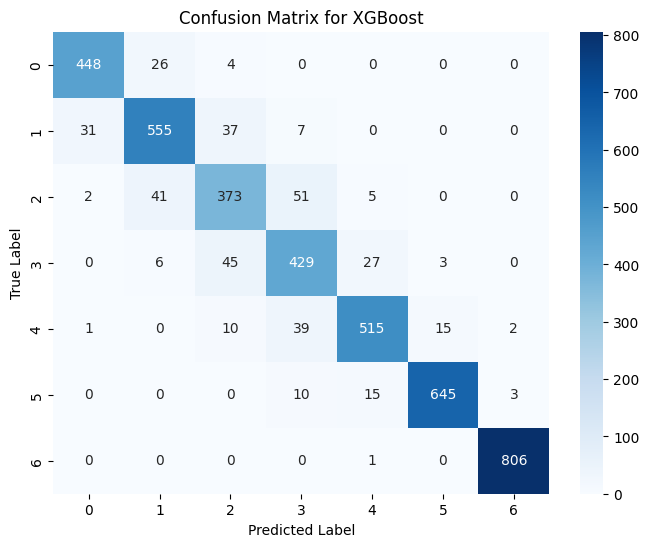

In [5]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost")
plt.show()

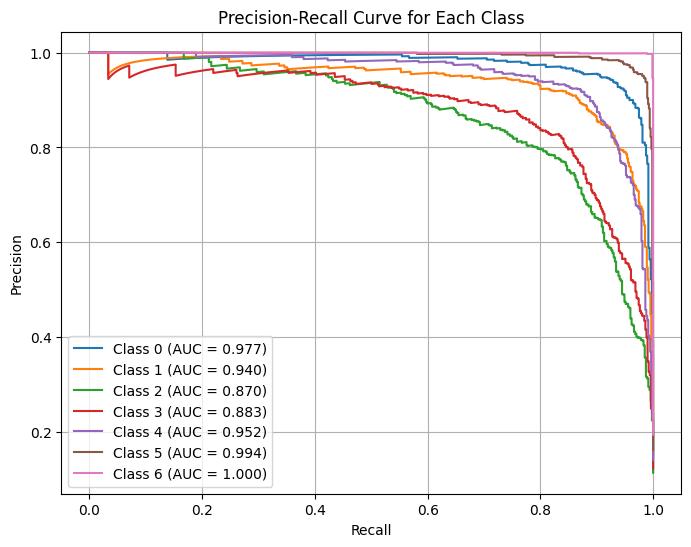

In [6]:
# 多類別PR曲線
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize

# 將 y_valid 轉換為 One-hot 編碼 (多類別 -> 二元)
y_valid_bin = label_binarize(y_valid, classes=np.unique(y_valid))
y_prob = model.predict_proba(X_valid)

# 畫出每個類別的 PR 曲線
plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(y_valid)):
    precision, recall, _ = precision_recall_curve(y_valid_bin[:, i], y_prob[:, i])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'Class {label} (AUC = {pr_auc:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 其他分類模型_未填參數
# # 訓練模型(邏輯回歸)
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)

# # 訓練模型(梯度提升機)
# from sklearn.ensemble import GradientBoostingClassifier
# model = GradientBoostingClassifier()
# model.fit(X_train, y_train)

# # 訓練模型(隨機森林)
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # 訓練模型(決策樹)
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)

# # 訓練模型(KNN)
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier() 
# model.fit(X_train, y_train)

# # 訓練模型(支持向量機)
# from sklearn.svm import SVC
# model = SVC()
# model.fit(X_train, y_train)

# # 訓練模型(多層感知器)
# from sklearn.neural_network import MLPClassifier
# model = MLPClassifier()
# model.fit(X_train, y_train)

In [ ]:
# 儲存模型
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)